# Frequency domain error index

This notebook will explore the Frequency Domain Error (FDE) index (found [here][WILEY] and [here][RESEARCHGATE]), a way of computing the difference between a computed and a measured signal in the frequency domain instead of the time domain.

[WILEY]: http://onlinelibrary.wiley.com/doi/10.1002/eqe.951/abstract

[RESEARCHGATE]: https://www.researchgate.net/publication/244968640_FDE_index_for_goodness-of-fit_between_measured_and_calculated_response_signals

This index is computed using the following formula:

$$FDE\ index = \frac {\sum_{i=0}^{n}{FFT(measured-computed)}} {\sum_{i=0}^{n} \left({FFT(computed)+FFT(measured)}\right)}$$

where $n$ is the last Fourier component of the signal. It has the interesting property that its values are bound between **zero** and **one**, meaning the former a perfect match between the two signals and the latter a complete opposition between them.

## Computational lab setup

In [1]:
%matplotlib inline

import sys

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl

from numpy.fft import rfft, rfftfreq
import matplotlib.pyplot as plt
from matplotlib.mlab import rms_flat

print(sys.version)
for module in (np, sp, pd, mpl):
    print('{:.<15}{}'.format(module.__name__, module.__version__))

3.5.2 |Anaconda 4.3.0 (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
numpy..........1.11.3
scipy..........0.18.1
pandas.........0.19.2
matplotlib.....2.0.0


The function to compute the FDE index according to the formula above is the following:

In [2]:
def FDEindex(comp, meas):
    """
    Return the Frequency Domain Error (FDE) index between computed and measured signals.
    
    Parameters:
        comp: array_like
            Computed signal.
        meas: array_like
            Measured signal.
    
    Returns:
        FDE: scalar
            Frequency Domain Error index
    
    Example:
        >>> FDEindex([0,1,2,1,0,-1,-2,-1], [0,1,2,1,0,-1,-2,-1]) # perfect match
        0.0
        >>> FDEindex([0,1,2,1,0,-1,-2,-1], [-1,0,1,2,1,0,-1,-2]) # time delay
        0.461939766256
        >>> FDEindex([0,1,2,1,0,-1,-2,-1], [0,-1,-2,-1,0,1,2,1]) # opposite phase
        1.0
    
    Reference:
        Jeff J. Dragovich and Andres Lepage
        FDE index for goodness-of-fit between measured and calculated response signal
        SHORT COMMUNICATION
        EARTHQUAKE ENGINEERING AND STRUCTURAL DYNAMICS, 2009; 38:1751–1758
        http://onlinelibrary.wiley.com/doi/10.1002/eqe.951/abstract
        https://www.researchgate.net/publication/244968640_FDE_index_for_goodness-of-fit_between_measured_and_calculated_response_signals
    """
    comp = np.asarray(comp)
    meas = np.asarray(meas)
    
    if comp.size != meas.size:
        raise ValueError('Parameters must have the same length!')
    
    COMP = rfft(comp)
    MEAS = rfft(meas)
    
    FDE = np.sum(np.absolute(MEAS-COMP))/np.sum(np.absolute(COMP)+np.absolute(MEAS))
    return FDE

Let us setup two harmonic signals to test the FDE index:

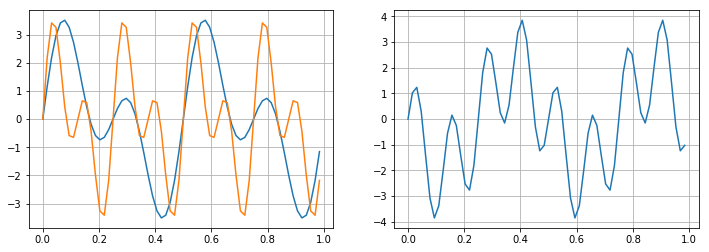

In [3]:
Ns = 64
tt = np.arange(Ns)/Ns
Acomp = 2.
fcomp = 2.
scomp = Acomp*(np.sin(2.*np.pi*fcomp*tt)+np.sin(2.*2.*np.pi*fcomp*tt))
Ameas = 1.*Acomp
fmeas = 2.*fcomp
dmeas = 0.*np.pi
smeas = Ameas*(np.sin(2.*np.pi*fmeas*tt+dmeas)+np.sin(2.*(2.*np.pi*fmeas*tt+dmeas)))
serr = smeas-scomp
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].plot(tt, scomp)
ax[0].plot(tt, smeas)
ax[0].grid(b=True)
ax[1].plot(tt, serr)
ax[1].grid(b=True)

The computation of results yields:

FDE index=0.50


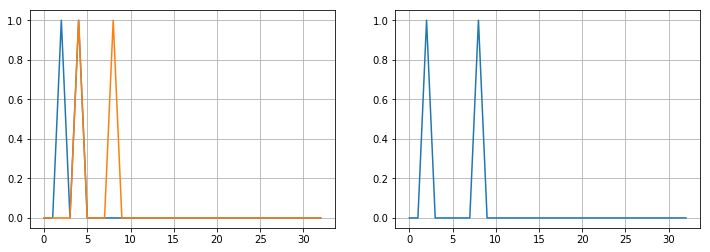

In [4]:
print('FDE index={:.2f}'.format(FDEindex(scomp, smeas)))
ff = rfftfreq(Ns, d=tt[1]-tt[0])
SCOMP = rfft(scomp)/Ns
SMEAS = rfft(smeas)/Ns
SERR = SMEAS-SCOMP
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(ff, np.absolute(SCOMP))
ax[0].plot(ff, np.absolute(SMEAS))
ax[0].grid(b=True)
ax[1].plot(ff, np.absolute(SERR))
ax[1].grid(b=True)

This notebook was created by Paulo Xavier Candeias.